# Load basic libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as ms

In [90]:
#import warnings
#warnings.filterwarnings('ignore')

# Load the data

In [91]:
df=pd.read_csv(r'C:\Users\ABHI\INEURON\PROJECTS\ADULT CENSUS PREDICTION\training_data_preprocessed.csv')
df.head(20)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,12303,32.0,Private,196342.0,doc,16.0,not_married,Prof-specialty,Not-in-family,White,Male,40,United-States,>50K
1,28040,61.0,Private,232808.0,school,6.0,other,Other-service,Not-in-family,White,Male,24,United-States,<=50K
2,11921,38.0,Private,205493.0,high school,9.0,married,Exec-managerial,Wife,White,Female,60,United-States,>50K
3,18797,46.0,Private,45363.0,higher,15.0,other,Prof-specialty,Not-in-family,White,Male,40,United-States,>50K
4,17424,44.0,Private,244974.0,high school,9.0,married,Sales,Husband,White,Male,60,United-States,<=50K
5,10761,33.0,Private,191385.0,undergrad,13.0,not_married,Prof-specialty,Not-in-family,White,Male,40,Canada,<=50K
6,30205,38.0,Private,187870.0,higher,15.0,married,Prof-specialty,Husband,White,Male,90,United-States,>50K
7,23822,20.0,Private,66695.0,higher,10.0,not_married,Prof-specialty,Own-child,Other,Female,35,United-States,<=50K
8,11440,67.0,Private,174603.0,high school,9.0,not_married,Exec-managerial,Not-in-family,White,Female,35,United-States,<=50K
9,13125,66.0,Private,142624.0,higher,12.0,married,Machine-op-inspct,Husband,White,Male,40,Yugoslavia,>50K


In [92]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [93]:
df=df.drop('Unnamed: 0',axis=1)
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,32.0,Private,196342.0,doc,16.0,not_married,Prof-specialty,Not-in-family,White,Male,40,United-States,>50K
1,61.0,Private,232808.0,school,6.0,other,Other-service,Not-in-family,White,Male,24,United-States,<=50K
2,38.0,Private,205493.0,high school,9.0,married,Exec-managerial,Wife,White,Female,60,United-States,>50K
3,46.0,Private,45363.0,higher,15.0,other,Prof-specialty,Not-in-family,White,Male,40,United-States,>50K
4,44.0,Private,244974.0,high school,9.0,married,Sales,Husband,White,Male,60,United-States,<=50K


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26048 non-null  float64
 1   workclass       26048 non-null  object 
 2   fnlwgt          26048 non-null  float64
 3   education       26048 non-null  object 
 4   education-num   26048 non-null  float64
 5   marital-status  26048 non-null  object 
 6   occupation      26048 non-null  object 
 7   relationship    26048 non-null  object 
 8   race            26048 non-null  object 
 9   sex             26048 non-null  object 
 10  hours-per-week  26048 non-null  int64  
 11  country         26048 non-null  object 
 12  salary          26048 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 2.6+ MB


In [95]:
df.shape

(26048, 13)

In [96]:
df['salary'].value_counts(normalize = True)*100

<=50K    76.059582
>50K     23.940418
Name: salary, dtype: float64

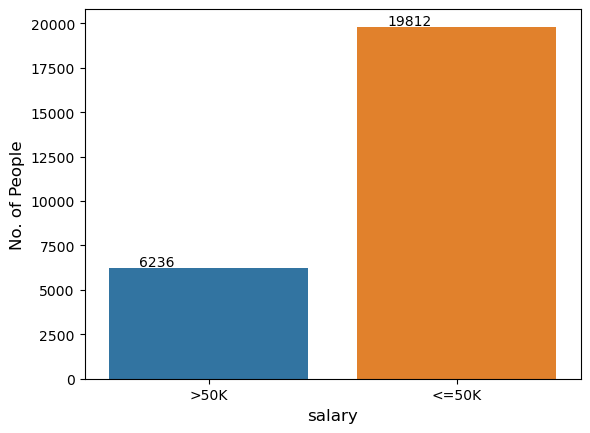

In [97]:
ax=sns.countplot(df['salary'])
plt.xlabel("salary", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+100))

### Here we can see that 76% people have income below 50k and remaining have income above 50k,so the data here is imbalance.we will consider this imbalance and train our top 3 Model.

### So we have imbalce data as we have <=50K with 19812 records and >50K class with 6236 records.

# Encoding feature from training set and test set

In [98]:
test_set=pd.read_csv(r"C:\Users\ABHI\INEURON\PROJECTS\ADULT CENSUS PREDICTION\test_set.csv")
test_set.head(2)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,27144,27,Private,181284,school,8,married,Prof-specialty,Husband,Black,Male,45,United-States,<=50K
1,11743,24,Private,235894,high school,9,married,Craft-repair,Husband,White,Male,38,United-States,<=50K


In [99]:
test_set=test_set.drop('Unnamed: 0',axis=1)
test_set.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,27,Private,181284,school,8,married,Prof-specialty,Husband,Black,Male,45,United-States,<=50K
1,24,Private,235894,high school,9,married,Craft-repair,Husband,White,Male,38,United-States,<=50K


In [100]:
train_set_encoded=df.copy()
test_set_encoded=test_set.copy()

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [102]:
for col in df.columns:    
    if df[col].dtypes == 'object':
        le.fit(df[col])
        train_set_encoded[col]=le.transform(train_set_encoded[col].astype(str))
        test_set_encoded[col]=le.transform(test_set_encoded[col].astype(str))      

In [103]:
train_set_encoded.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,32.0,3,196342.0,0,16.0,1,9,1,4,1,40,38,1
1,61.0,3,232808.0,4,6.0,2,7,1,4,1,24,38,0
2,38.0,3,205493.0,2,9.0,0,3,5,4,0,60,38,1
3,46.0,3,45363.0,3,15.0,2,9,1,4,1,40,38,1
4,44.0,3,244974.0,2,9.0,0,11,0,4,1,60,38,0
5,33.0,3,191385.0,5,13.0,1,9,1,4,1,40,1,0
6,38.0,3,187870.0,3,15.0,0,9,0,4,1,90,38,1
7,20.0,3,66695.0,3,10.0,1,9,3,3,0,35,38,0
8,67.0,3,174603.0,2,9.0,1,3,1,4,0,35,38,0
9,66.0,3,142624.0,3,12.0,0,6,0,4,1,40,40,1


In [104]:
test_set_encoded.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,27,3,181284,4,8,0,9,0,2,1,45,38,0
1,24,3,235894,2,9,0,2,0,4,1,38,38,0
2,30,3,65278,2,9,0,12,0,4,1,40,38,1
3,20,3,117476,3,10,0,2,0,4,1,40,38,0
4,54,3,88019,3,10,2,13,1,4,1,55,38,0
5,51,1,136823,2,9,0,3,5,4,0,32,38,0
6,52,3,204584,5,13,2,3,1,4,0,42,38,0
7,45,4,201699,0,16,0,9,0,4,1,60,38,1
8,23,1,304386,2,9,1,7,1,4,0,40,38,0
9,51,3,199688,5,13,0,3,0,4,1,60,38,1


# MODEL TRAINING AND EAVALUTION WITH DEFAULT PARAMETER

In [105]:
x_train=train_set_encoded.drop('salary',axis=1)
y_train=train_set_encoded['salary']

x_test=test_set_encoded.drop('salary',axis=1)
y_test=test_set_encoded['salary']


In [106]:
print(x_train.shape,y_train.shape)

(26048, 12) (26048,)


In [107]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC


In [118]:
#all metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.metrics import auc,roc_curve

# Using Randome Forest classifier

In [108]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [109]:
y_pred_rf=rf.predict(x_test)

In [110]:
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0])

In [111]:
# evaluating the RandomeForest model
print("Training Accuracy :", rf.score(x_train, y_train))
print("Testing Accuracy :", rf.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_rf,y_test))
print('*'*100)
print(confusion_matrix(y_pred_rf,y_test))
print('*'*100)
print(classification_report(y_pred_rf,y_test))

Training Accuracy : 0.9999232186732187
Testing Accuracy : 0.8284968524489482
ROC AUC Score : 0.7714573511578992
****************************************************************************************************
[[4430  639]
 [ 478  966]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      5069
           1       0.60      0.67      0.63      1444

    accuracy                           0.83      6513
   macro avg       0.75      0.77      0.76      6513
weighted avg       0.84      0.83      0.83      6513



In [267]:
score_rf = pd.DataFrame(rf.cv_results_)
score_rf.head()

AttributeError: 'RandomForestClassifier' object has no attribute 'cv_results_'

In [116]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_rf)
print("fpr :",fpr)
print("tpr :",tpr)
print("threshold :",threshold)

fpr : [0.         0.09739201 1.        ]
tpr : [0.         0.60186916 1.        ]
threshold : [2 1 0]


In [119]:
#goodness of random forest model
roc_auc=auc(fpr,tpr)
roc_auc

0.752238572919285

# Manual Search for Optimal Parameter

### finding optimal no. of estimators

In [125]:
n_estimators=[1,2,4,8,16,32,64,100,200]
train_results=[]
test_results=[]

### creating function to find optimal parameter

# Using GridSearchCv()

In [134]:
#Defining All hyperparameter and its values

#number of trees in random_forest
n_estimators=[int(x) for x in np.linspace(10,80,10)]

#number of feature to consider at every split
max_features=['auto','sqrt']

#maximum number of levels in tree
max_depth=[2,4]

#minimum number of samples required to split a node
min_samples_split=[2,5]

#minimum number of samples required at each leaf node
min_samples_leaf=[1,2]

#Method of selecting samples for training each tree
bootstrap=[True,False]

In [139]:
#creating param_grid
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'bootstrap':bootstrap}

print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [142]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,verbose=2,n_jobs=-1,random_state=42)
rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=200, n_jobs=-1),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [143]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 33}

In [205]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=4, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5, n_estimators=33,
                       n_jobs=-1)

In [145]:
rf_grid.best_score_

0.8212915350846463

In [146]:
#checking accuracies with best params
print('training accuracy with GridSearchCv: ',rf_grid.score(x_train,y_train))
print('testing accuracy with GridSearchCv: ',rf_grid.score(x_test,y_test))

training accuracy with GridSearchCv:  0.8210995085995086
testing accuracy with GridSearchCv:  0.8211269768155995


### Prediction after hyperparameter tuning(model with GridSearchCV)

In [170]:
y_pred_rf_gridsearch=rf_grid.predict(x_test)

In [171]:
y_pred_rf_gridsearch

array([0, 0, 0, ..., 1, 0, 0])

In [172]:
# evaluating the RandomeForest model
print("Training Accuracy :", rf_grid.score(x_train, y_train))
print("Testing Accuracy :", rf_grid.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_rf_gridsearch,y_test))
print('*'*100)
print(confusion_matrix(y_pred_rf_gridsearch,y_test))
print('*'*100)
print(classification_report(y_pred_rf_gridsearch,y_test))

Training Accuracy : 0.8210995085995086
Testing Accuracy : 0.8211269768155995
ROC AUC Score : 0.7918006665738727
****************************************************************************************************
[[4691  948]
 [ 217  657]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      5639
           1       0.41      0.75      0.53       874

    accuracy                           0.82      6513
   macro avg       0.68      0.79      0.71      6513
weighted avg       0.88      0.82      0.84      6513



In [233]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_rf_gridsearch)
print("fpr :",fpr)
print("tpr :",tpr)
print("threshold :",threshold)

fpr : [0.         0.04421353 1.        ]
tpr : [0.         0.40934579 1.        ]
threshold : [2 1 0]


In [234]:
#goodness of random forest model
roc_auc=auc(fpr,tpr)
roc_auc

0.682566132730084

# Using RandomSearchCv()

In [151]:
from sklearn.model_selection import RandomizedSearchCV

In [147]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Assigning the range of values for some important hyperparameters

In [156]:
n_estimators= list(range(10,220,50))
criterion= ['gini', 'entropy']
max_depth= list(range(5,41,10))
min_samples_split= [2,3,4,5,6]
min_samples_leaf= [1,2,3,4]
max_features= ['sqrt', 'log2']

In [157]:
params_grid = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features
}

In [164]:
rf_random_search = RandomizedSearchCV(estimator=rf,
                              param_distributions=params_grid,
                              n_iter=10,
                              cv=3,
                              scoring=None,
                              return_train_score=True,
                              verbose=2,
                              random_state=0)

In [165]:
rf_random_search.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=210; total time=   2.3s
[CV] END criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=210; total time=   2.3s
[CV] END criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=210; total time=   2.2s
[CV] END criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=210; total time=   2.9s
[CV] END criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=210; total time=   2.3s
[CV] END criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=210; total time=   2.2s
[CV] END criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60; tota

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=200,
                                                    n_jobs=-1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 15, 25, 35],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 60, 110, 160,
                                                         210]},
                   random_state=0, return_train_score=True, verbose=2)

In [166]:
rf_random_search.best_params_

{'n_estimators': 210,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 15,
 'criterion': 'entropy'}

In [197]:
rf_random_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=210, n_jobs=-1)

In [167]:
rf_random_search.best_score_

0.8400260830710403

In [168]:
#checking accuracies with best params
print('training accuracy with GridSearchCv: ',rf_random_search.score(x_train,y_train))
print('testing accuracy with GridSearchCv: ',rf_random_search.score(x_test,y_test))

training accuracy with GridSearchCv:  0.8735795454545454
testing accuracy with GridSearchCv:  0.8409335175802242


### Prediction after hyperparameter tuning(model with randome search)

In [173]:
y_pred_rf_randomsearch=rf_random_search.predict(x_test)

In [174]:
y_pred_rf_randomsearch

array([0, 0, 0, ..., 1, 0, 0])

In [175]:
# evaluating the RandomeForest model
print("Training Accuracy :", rf_random_search.score(x_train, y_train))
print("Testing Accuracy :", rf_random_search.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_rf_randomsearch,y_test))
print('*'*100)
print(confusion_matrix(y_pred_rf_randomsearch,y_test))
print('*'*100)
print(classification_report(y_pred_rf_randomsearch,y_test))

Training Accuracy : 0.8735795454545454
Testing Accuracy : 0.8409335175802242
ROC AUC Score : 0.7956554875332207
****************************************************************************************************
[[4548  676]
 [ 360  929]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      5224
           1       0.58      0.72      0.64      1289

    accuracy                           0.84      6513
   macro avg       0.75      0.80      0.77      6513
weighted avg       0.86      0.84      0.85      6513



In [235]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_rf_randomsearch)
print("fpr :",fpr)
print("tpr :",tpr)
print("threshold :",threshold)

fpr : [0.         0.07334963 1.        ]
tpr : [0.        0.5788162 1.       ]
threshold : [2 1 0]


In [236]:
#goodness of random forest model
roc_auc=auc(fpr,tpr)
roc_auc

0.7527332830625567

# Using xgboost model

In [176]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [177]:
y_pred_xgb=xgb.predict(x_test)

In [178]:
y_pred_xgb

array([0, 0, 0, ..., 1, 0, 0])

In [179]:
# evaluating the XGBClassifier model
print("Training Accuracy :", xgb.score(x_train, y_train))
print("Testing Accuracy :", xgb.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_xgb,y_test))
print('*'*100)
print(confusion_matrix(y_pred_xgb,y_test))
print('*'*100)
print(classification_report(y_pred_xgb,y_test))

Training Accuracy : 0.8935042997542998
Testing Accuracy : 0.8343313373253493
ROC AUC Score : 0.7805596883875411
****************************************************************************************************
[[4461  632]
 [ 447  973]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      5093
           1       0.61      0.69      0.64      1420

    accuracy                           0.83      6513
   macro avg       0.76      0.78      0.77      6513
weighted avg       0.84      0.83      0.84      6513



In [239]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_xgb)
print("fpr :",fpr)
print("tpr :",tpr)
print("threshold :",threshold)

fpr : [0.         0.09107579 1.        ]
tpr : [0.         0.60623053 1.        ]
threshold : [2 1 0]


In [240]:
#goodness of random forest model
roc_auc=auc(fpr,tpr)
roc_auc

0.7575773674869942

### Hyperparameter Tunning using GridSearchCV of XgBoost model

In [181]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [211]:
params={'learning_rate':[0.15,0.20],
      'n_estimators': [100,120],
      'min_child_weight':[1,3,5],
      'max_depth': [3,4,5],
      'gamma': [0.2,0.3,0.4],
      'colsample_bytree': [0.3,0.4,0.5]
       }

In [212]:
xgb_grid=GridSearchCV(estimator=xgb,param_grid=params,scoring=None,cv=3,verbose=1,return_train_score=True,n_jobs=-1)

In [213]:
xgb_grid.fit(x_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012...
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='au

In [215]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=120, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [217]:
xgb_grid.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 120}

In [216]:
xgb_grid.best_score_

0.8432893543204495

In [230]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=120, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [227]:
score=cross_val_score(xgb_classif,x_train,y_train,cv=5)

In [228]:
score

array([0.83704415, 0.83761996, 0.84740883, 0.8539067 , 0.8406604 ])

### model testing with xgboost with its best hyperparameters

In [222]:
xgb_classif=XGBClassifier(colsample_bytree=0.4,
                          gamma= 0.2,
                          learning_rate= 0.15,
                          max_depth= 3,
                          min_child_weight= 1,
                          n_estimators= 120)

In [223]:
xgb_classif.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=120, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [224]:
y_pred_xgbclassif_with_hp=xgb_classif.predict(x_test)

In [225]:
y_pred_xgbclassif_with_hp

array([0, 0, 0, ..., 1, 0, 0])

In [226]:
# evaluating the XGBClassifier model
print("Training Accuracy :", xgb_classif.score(x_train, y_train))
print("Testing Accuracy :", xgb_classif.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_xgbclassif_with_hp,y_test))
print('*'*100)
print(confusion_matrix(y_pred_xgbclassif_with_hp,y_test))
print('*'*100)
print(classification_report(y_pred_xgbclassif_with_hp,y_test))

Training Accuracy : 0.8491630835380836
Testing Accuracy : 0.8466144633809305
ROC AUC Score : 0.8014090516149226
****************************************************************************************************
[[4535  626]
 [ 373  979]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5161
           1       0.61      0.72      0.66      1352

    accuracy                           0.85      6513
   macro avg       0.77      0.80      0.78      6513
weighted avg       0.86      0.85      0.85      6513



AttributeError: 'XGBClassifier' object has no attribute 'cv_results_'

In [259]:
y_proba_1=xgb_classif.predict_proba(x_test)[:,1]
y_proba_1

array([0.16199471, 0.06992092, 0.2068548 , ..., 0.75179756, 0.43947798,
       0.02253771], dtype=float32)

In [260]:
fpr,tpr,thresholds=roc_curve(y_test,y_proba_1)

In [262]:
thresholds

array([1.9543483e+00, 9.5434839e-01, 9.0349418e-01, ..., 3.2596153e-04,
       3.2430567e-04, 2.5096847e-04], dtype=float32)

In [231]:
score=cross_val_score(xgb_classif,x_train,y_train,cv=5)

In [232]:
score

array([0.83704415, 0.83761996, 0.84740883, 0.8539067 , 0.8406604 ])

So Xgboost give consistently good score on 5 fold cross validation

In [245]:
#goodness of random forest model
roc_auc_score(y_test,y_pred_xgbclassif_with_hp)

0.7669852386719375

In [263]:
roc_auc_score(y_test,y_proba_1)

0.8956495466743851

### Among Randome forest and XgBoost ,XgBoost model is giving best results.

# So We will choose XgBoost as our final model